In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sir_alpha import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


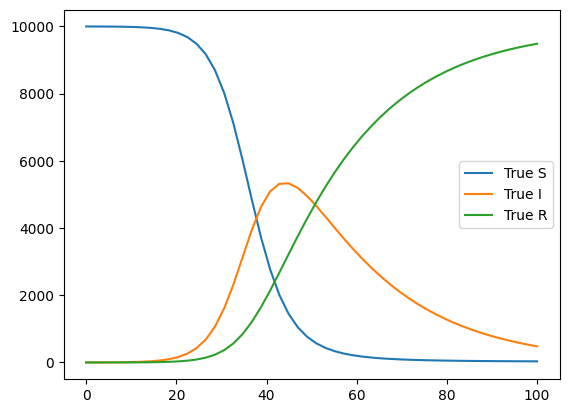

In [2]:
t = np.linspace(0, 100, 50)

S, I, R = simulate_sir(t)
plot_sir(S, I, R, t)

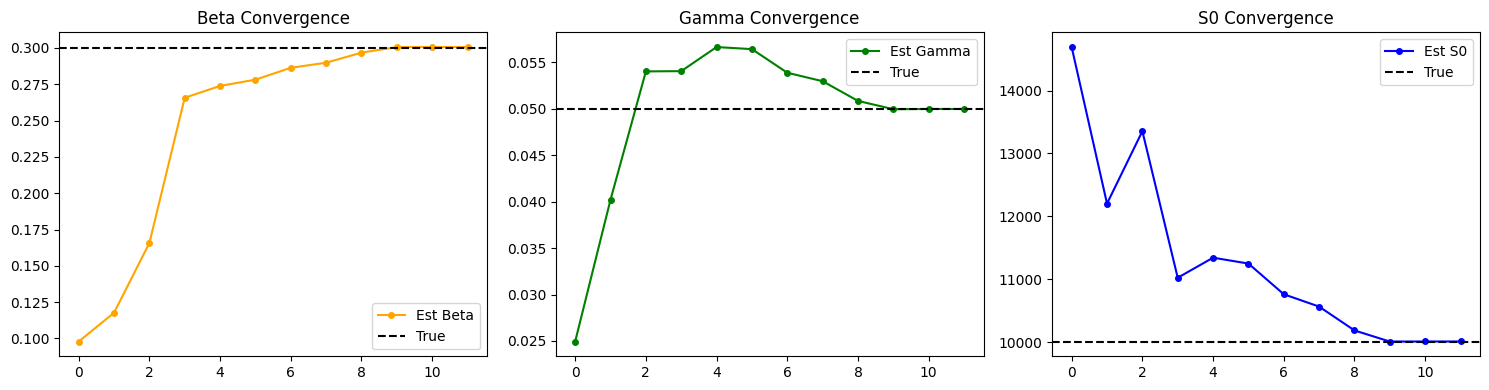

In [15]:
I_data = I + np.random.normal(0, 0.01 * I, size=I.shape)

# initial guess
beta0 = 0.1
gamma0 = 0.00003
S00 = 6000

result = run_experiments(beta0, gamma0, S00, I_data, t)
plot_results(result)

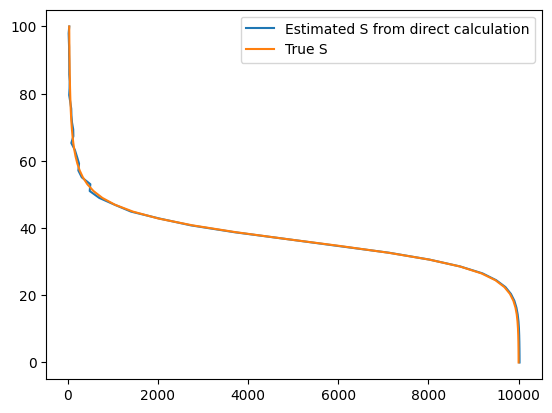

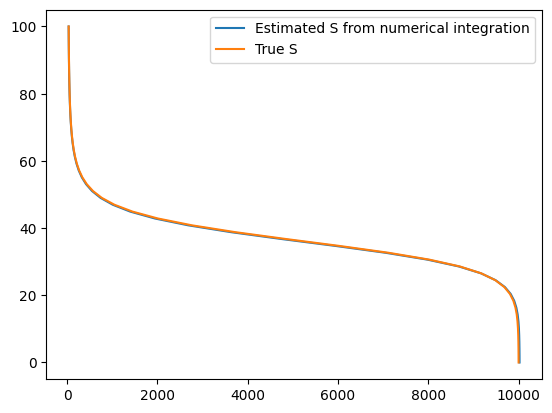

In [9]:
I_data = I + np.random.normal(0, 0.01 * I, size=I.shape)

# initial guess
beta0 = 0.1
gamma0 = 0.03
S00 = 1000
x0 = [beta0, gamma0, beta0 / (S00 + I_data[0])]

res = least_squares(residual, x0, args=(I_data, t))
beta_hat, gamma_hat, S0_hat = tuple([res.x[0], res.x[1], (res.x[0] / res.x[2] - I_data[0])])

# from the relationship equation
I_int = np.array([simpson(I_data[:i + 1], t[:i + 1]) for i in range(len(t))])
S_hat = S0_hat - I_data + I_data[0] - gamma_hat * I_int

# from numerical integration
solution_hat = scipy.integrate.odeint(SIR, [S0_hat, I_data[0], R0], t, args=(beta_hat, gamma_hat))
S_hat_2 = solution_hat.T[0]

# plot
plt.plot(S_hat, t, label="Estimated S from direct calculation")
plt.plot(S, t, label="True S")
plt.legend()
plt.show()

plt.plot(S_hat_2, t, label="Estimated S from numerical integration")
plt.plot(S, t, label="True S")
plt.legend()
plt.show()